# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Mohamed Haider

ID:52-3773

Tutorial:T-6

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()

<ipython-input-39-69f679858591>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [40]:
print(df.head())

print(df.tail())

print(df.shape)

print(df.dtypes)

print(df.describe())

print(df.isnull().sum())

print(df['body'])

print(df['make'].unique())

print(df['make'].value_counts())






   year     make         model   trim          body transmission  \
0  2013  Hyundai        Sonata    GLS         sedan    automatic   
1  2014   Toyota       4Runner    SR5           SUV    automatic   
2  2012    Lexus        IS 250   Base         Sedan    automatic   
3  2002      BMW            X5   4.4i           SUV    automatic   
4  2014     Ford  E-Series Van  E-250  E-Series Van    automatic   

                 vin state  condition    odometer   color interior  \
0  5npeb4acxdh702805    ma        3.9   50404.0mi   black     gray   
1  jtezu5jr2e5064567    fl        4.9   17846.0mi    gray        —   
2  jthbf5c24c5168599    fl        4.1   21122.0mi  silver    black   
3  5uxfb33562lh33864    fl        1.9  145303.0mi   black    black   
4  1ftne2ew0eda31832    wa        4.9    6714.0mi   white     gray   

                             seller     mmr sellingprice  \
0             the hertz corporation  $11000       $10900   
1  award auto sales and leasing inc  $28700       

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [41]:
df['sellingprice'] = df['sellingprice'].str.replace(',', '')
df['sellingprice'] = df['sellingprice'].str.replace('$', '')
df['sellingprice'] = df['sellingprice'].astype(int)





df['mmr'] = df['mmr'].str.replace(',', '')
df['mmr'] = df['mmr'].str.replace('$', '')
df['mmr'] = df['mmr'].astype(int)



df['odometer'] = df['odometer'].str.replace('mi', '').astype(float)
df['odometer'] = df['odometer'].astype(float)




df['make'] = df['make'].str.lower()
df['make'] = df['make'].apply(lambda x: x.capitalize())



df['model'] = df['model'].str.lower()
df['model'] = df['model'].apply(lambda x: x.capitalize())


df['trim'] = df['trim'].str.lower()
df['trim'] = df['trim'].apply(lambda x: x.capitalize())


df['body'] = df['body'].str.lower()

df['body']= np.where(df['body'].str.contains('sedan'),'Sedan',df['body'])
df['body']= np.where(df['body'].str.contains('coupe'),'Coupe',df['body'])
df['body']= np.where(df['body'].str.contains('koup'),'Coupe',df['body'])
df['body']= np.where(df['body'].str.contains('convertible'),'Convertible',df['body'])
df['body']= np.where(df['body'].str.contains('hatchback'),'Hatchback',df['body'])
df['body']= np.where(df['body'].str.contains('suv'),'SUV',df['body'])
df['body']= np.where(df['body'].str.contains('van'),'Minivan',df['body'])
df['body']= np.where(df['body'].str.contains('wagon'),'Wagon',df['body'])
df['body']= np.where(df['body'].str.contains('cab'),'Pickup Truck',df['body'])
df['body']= np.where(df['body'].str.contains('supercrew'),'Pickup Truck',df['body'])


print(df.color.unique())
print(df.interior.unique())



c_mode = df[df['color'] !='—']['color'].mode()[0]
df['color'] = df['color'].replace('—',c_mode)



i_mode = df[df['interior'] !='—']['interior'].mode()[0]
df['interior'] = df['interior'].replace('—',i_mode)

print(df.color.unique())




print(df.body.unique())
print(df.make.unique())
print(df.dtypes)





<ipython-input-41-9feca60a9cf8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['sellingprice'] = df['sellingprice'].str.replace('$', '')
<ipython-input-41-9feca60a9cf8>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['mmr'] = df['mmr'].str.replace('$', '')


['black' 'gray' 'silver' 'white' 'blue' 'burgundy' 'beige' 'gold' 'green'
 'red' 'purple' '—' 'yellow' 'brown' 'turquoise' 'orange' 'off-white'
 'charcoal' 'pink' 'lime']
['gray' '—' 'black' 'beige' 'tan' 'red' 'blue' 'brown' 'off-white'
 'silver' 'orange' 'purple' 'white' 'gold' 'burgundy' 'green' 'yellow']
['black' 'gray' 'silver' 'white' 'blue' 'burgundy' 'beige' 'gold' 'green'
 'red' 'purple' 'yellow' 'brown' 'turquoise' 'orange' 'off-white'
 'charcoal' 'pink' 'lime']
['Sedan' 'SUV' 'Minivan' 'Pickup Truck' 'Wagon' 'Coupe' 'Convertible'
 'Hatchback']
['Hyundai' 'Toyota' 'Lexus' 'Bmw' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'Gmc'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'Mini' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land rover' 'Suzuki' 'Mercury' 'Hummer' 'Saab'
 'Maserati' 'Fiat' 'Geo' 'Smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'As

<Axes: xlabel='color', ylabel='sellingprice'>

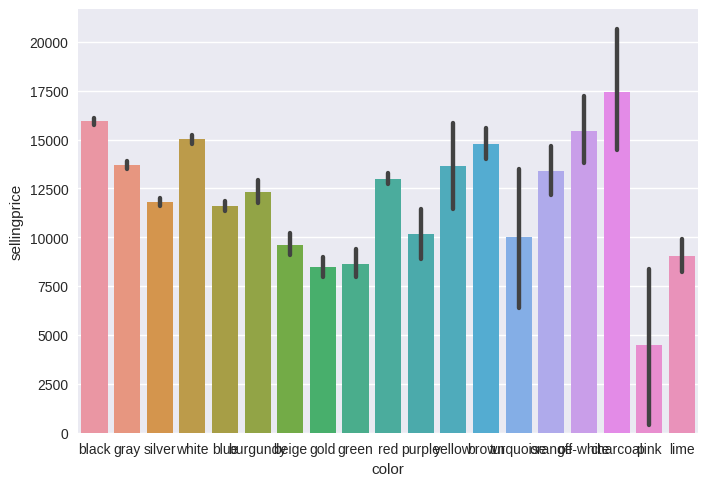

In [42]:
sns.barplot(x='color', y='sellingprice', data=df)

<Axes: xlabel='make', ylabel='sellingprice'>

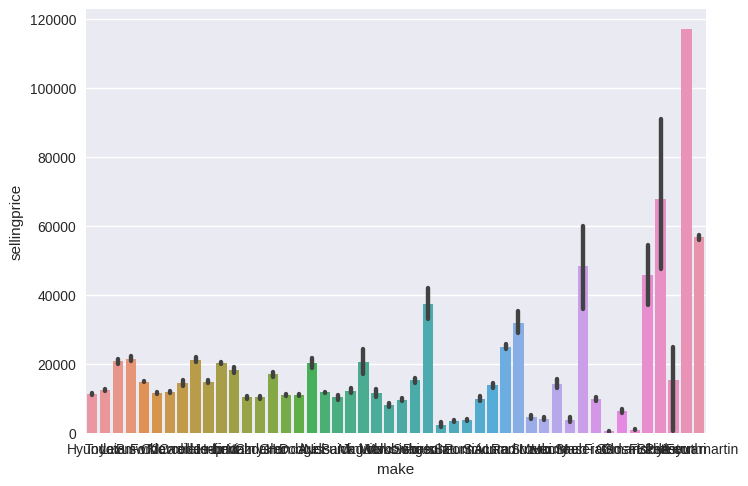

In [43]:
sns.barplot(x='make', y='sellingprice', data=df)

In [44]:
#sns.barplot(x='trim', y='sellingprice', data=df)
print(df['trim'].nunique())

1085


In [45]:
df['seller'].nunique()

4686

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

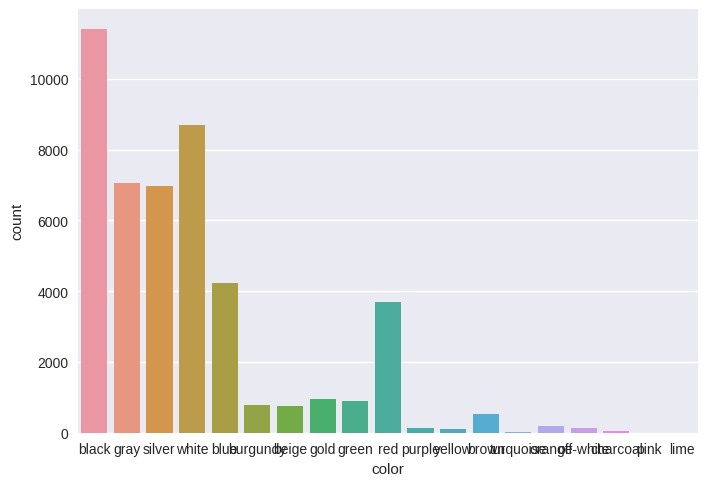

In [46]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

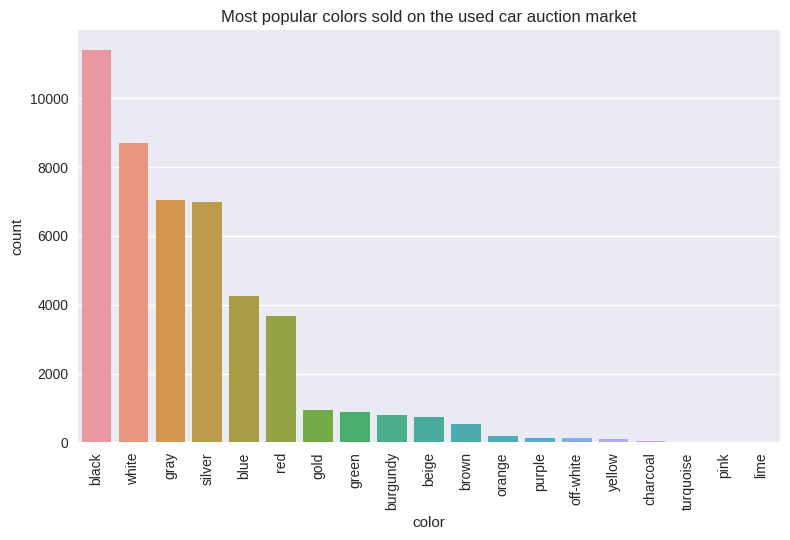

In [47]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

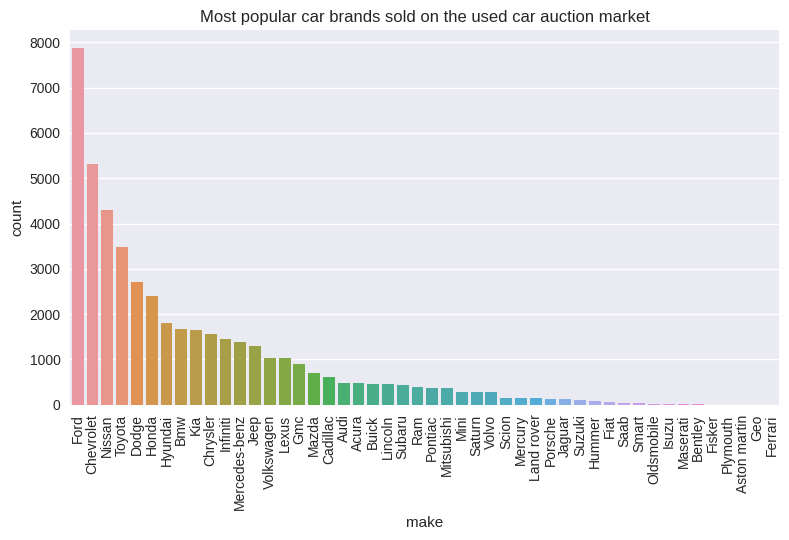

In [48]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

# **Answer for Q1**: Ford,Chevrolet and Nissan


**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

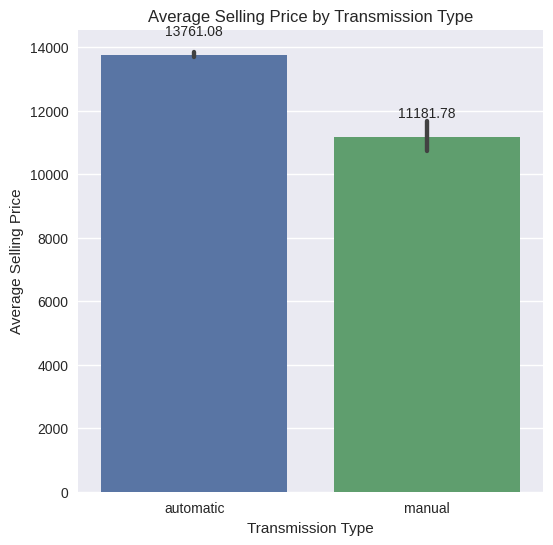

In [49]:

plt.figure(figsize=(6,6))
sns.barplot(x='transmission', y='sellingprice', data=df )
plt.title("Average Selling Price by Transmission Type")
plt.ylabel("Average Selling Price")
plt.xlabel("Transmission Type")

average_prices = df.groupby('transmission')['sellingprice'].mean()
for i, average_price in enumerate(average_prices):
    plt.text(i, average_price + 500, f'{average_price:.2f}', ha='center', va='bottom')



plt.show()


**Answer for Q2**: On average automatic cars sell more than manual cars

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

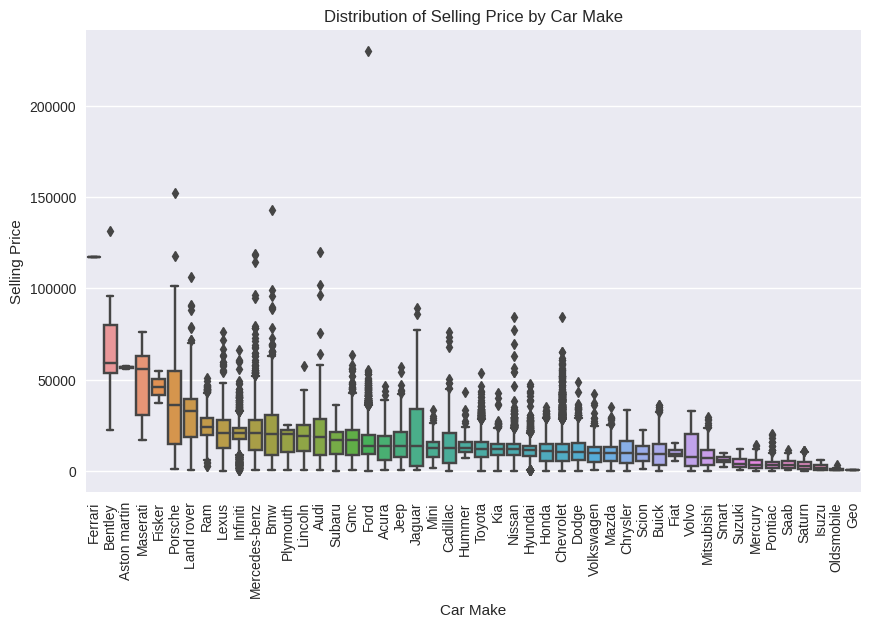

In [50]:
plt.figure(figsize=(10,6))
sorted_makes = df.groupby('make')['sellingprice'].median().sort_values(ascending=False).index
sns.boxplot(x='make', y='sellingprice', data=df, order=sorted_makes)
plt.title("Distribution of Selling Price by Car Make")
plt.ylabel("Selling Price")
plt.xlabel("Car Make")
plt.xticks(rotation=90)
plt.show()

**Answer for Q3**: Car makes that have the widest distribution of selling price are Porsche and Maserati.
The two most expensive cars are Ferari Bently.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

The correlation between odometer reading and selling price is: -0.58


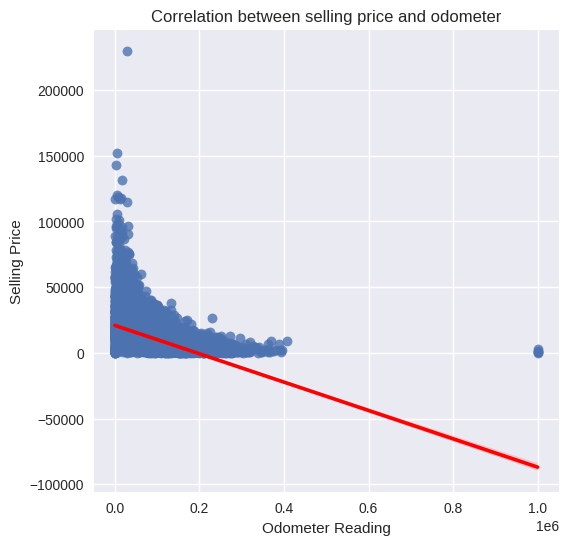

In [51]:
correlation = df['odometer'].corr(df['sellingprice'])
print(f"The correlation between odometer reading and selling price is: {correlation:.2f}")

# Plotting
plt.figure(figsize=(6,6))
sns.regplot(x='odometer', y='sellingprice', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title("Correlation between selling price and odometer")
plt.ylabel("Selling Price")
plt.xlabel("Odometer Reading")
plt.show()

**Answer for Q4**: They are negativily correlated.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

The correlation between odometer reading and selling price is: 0.53


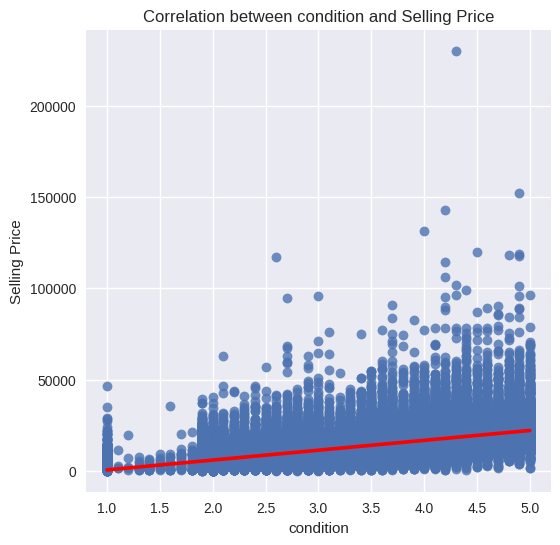

In [52]:
correlation = df['condition'].corr(df['sellingprice'])
print(f"The correlation between odometer reading and selling price is: {correlation:.2f}")

plt.figure(figsize=(6,6))
sns.regplot(x='condition', y='sellingprice', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title("Correlation between condition and Selling Price")
plt.ylabel("Selling Price")
plt.xlabel("condition")
plt.show()

**Answer for Q5**: They are positively correlated

**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**

**Visualization**

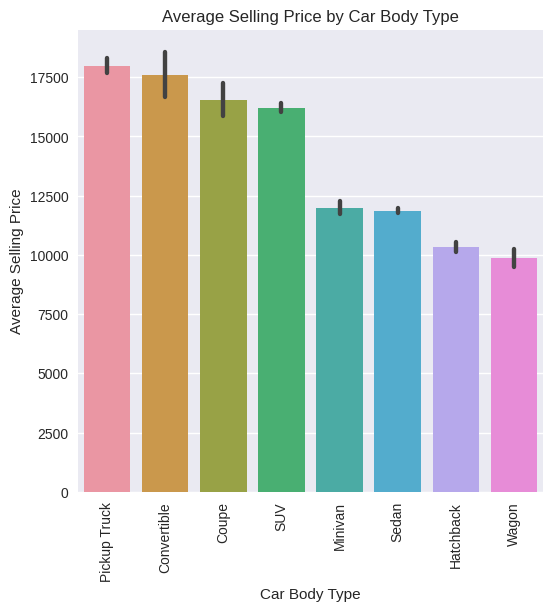

In [53]:
sorted_body_types = df.groupby('body')['sellingprice'].mean().sort_values(ascending=False).index
plt.figure(figsize=(6,6))
sns.barplot(x='body', y='sellingprice', data=df, order=sorted_body_types)
plt.title("Average Selling Price by Car Body Type")
plt.ylabel("Average Selling Price")
plt.xlabel("Car Body Type")
plt.xticks(rotation=90)
plt.show()

**Answer for Q6**: Your answer here

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [121]:
categorical_columns = [ 'make', 'body', 'transmission' ,'color','interior']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

df_encode.drop(columns=['vin','mmr','saledate', 'seller', 'state','model', 'trim'], inplace=True)
df_encode.head()

numerical_columns = ['condition','odometer', 'year']
df_encode[numerical_columns] = (
    df_encode[numerical_columns] - df_encode[numerical_columns].min()
) /(
    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)

df_encode.head()

Columns in original data frame:
 ['year' 'make' 'model' 'trim' 'body' 'transmission' 'vin' 'state'
 'condition' 'odometer' 'color' 'interior' 'seller' 'mmr' 'sellingprice'
 'saledate']

Number of rows and columns in the dataset: (46578, 16)

Columns in data frame after encoding dummy variable:
 ['year' 'model' 'trim' 'vin' 'state' 'condition' 'odometer' 'seller' 'mmr'
 'sellingprice' 'saledate' 'make_Aston martin' 'make_Audi' 'make_Bentley'
 'make_Bmw' 'make_Buick' 'make_Cadillac' 'make_Chevrolet' 'make_Chrysler'
 'make_Dodge' 'make_Ferrari' 'make_Fiat' 'make_Fisker' 'make_Ford'
 'make_Geo' 'make_Gmc' 'make_Honda' 'make_Hummer' 'make_Hyundai'
 'make_Infiniti' 'make_Isuzu' 'make_Jaguar' 'make_Jeep' 'make_Kia'
 'make_Land rover' 'make_Lexus' 'make_Lincoln' 'make_Maserati'
 'make_Mazda' 'make_Mercedes-benz' 'make_Mercury' 'make_Mini'
 'make_Mitsubishi' 'make_Nissan' 'make_Oldsmobile' 'make_Plymouth'
 'make_Pontiac' 'make_Porsche' 'make_Ram' 'make_Saab' 'make_Saturn'
 'make_Scion' 'make_Sm

,year,condition,odometer,mmr,sellingprice,make_Aston martin,make_Audi,make_Bentley,make_Bmw,make_Buick,...,interior_gray,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow
0,0.92,0.725,0.050403,0.075184,10900,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.96,0.975,0.017845,0.196438,29900,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.88,0.775,0.021121,0.151910,24200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.48,0.225,0.145302,0.025004,3200,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.96,0.975,0.006713,0.153965,22100,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Modelling

_Apply the linear regression model below._

In [122]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('sellingprice',axis=1) # Independent variable
y = df_encode['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


In [123]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

## Model Evaluation

_Evaluate the model you applied._

In [124]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  1487.5553835644903
R^2 obtained is: 0.9760489796871658


In [125]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

# Due to the model erroneously predicting negative values for the insurance charges, MSLE cannot be used (log of negative numbers is invalid)
# Such a discovery, while accidental, provides another hint that the predictions needs to be further improved before model deployment,
# as negative values should not be output for insurance charges predictions

# msle = mean_squared_log_error(y_test, y_pred)


print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

# print('The mean squared log error (MSLE) is: ', msle)

The mean absolute percentage error (MAPE) is:  0.1437347824837199
The median absolute error (MAE) is:  691.6460114510755


## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.